<a href="https://colab.research.google.com/github/sdasnoon/personal_projects/blob/master/Visualization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization in python

**Importing google libraries for fetching data from google drive**

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Authenticating with google to fetch data**

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Download files from google dive**

In [0]:
downloaded = drive.CreateFile({'id':"1AFKDXyxhJBIzlU_bK3zPBKvyB08JNdjo"})  
downloaded.GetContentFile('temporal.csv')

**Importing Pandas and viewing data **

In [0]:
import pandas as pd
df = pd.read_csv('temporal.csv')
df.head(10) #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


**Describe the database**

In [0]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


**Show column type and more info about dataframe**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


**Change view options for pandas to extend **

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Change view of pandas data type - This doesnot change the actual dataframe**

In [0]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}

In [0]:
#We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])

In [0]:
#We apply the style to the visualization
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


**Higlighting Maximum and Minimum Values**

In [0]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data

In [0]:
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


**Color formating - Gradient**

In [0]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')
#Use cmap to map the color , BUGN is palette code 

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


**Bar Formatting**

In [0]:
df.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


**Complex Visualization**

In [0]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [0]:
!pip install pandas_profiling

**This is not working as of now with pandas 1.0 , was compatible with older version of pandas , also its really slow with large datasets**

In [0]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')
# Example report : https://todoia.es/recursos/informe.html

### **MATPLOTLIB**

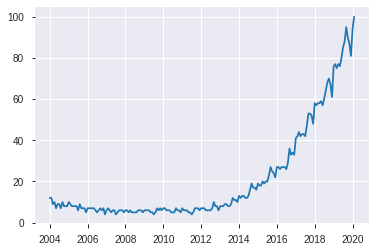

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['Mes'], df['data science'], label='data science')

To Show multiple plots at once

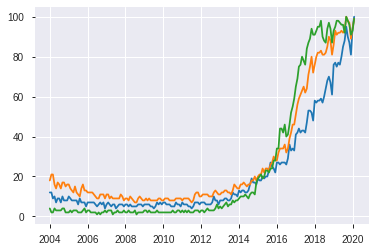

In [0]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')

**Adding legends to the chart**

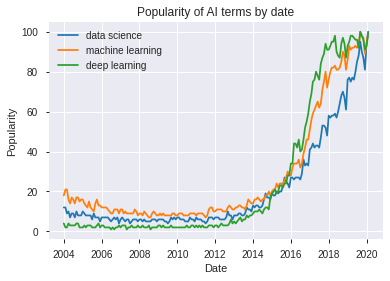

In [0]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend() #use this to plot legends

 

```
# If you are working with Python from the terminal or a script, after defining the graph with the functions we have written above use plt.show(). 
If you’re working from jupyter notebook, add %matplotlib inline to the beginning of the file and run it before making the chart
```

.

**Multiple charts in same plot - using subplot method**

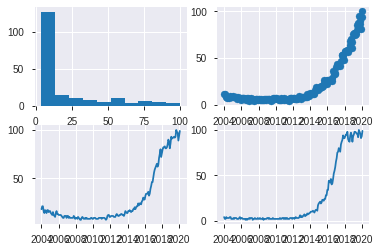

In [0]:
fig, axes = plt.subplots(2,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].scatter(df['Mes'], df['data science'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])

**Graph with different point styles ***

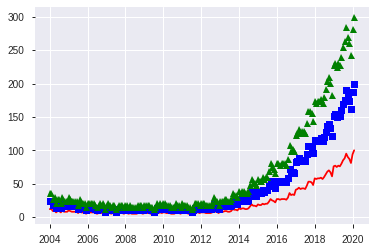

In [0]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['data science']*2, 'bs')
plt.plot(df['Mes'], df['data science']*3, 'g^')

**Scatterplot**

No handles with labels found to put in legend.


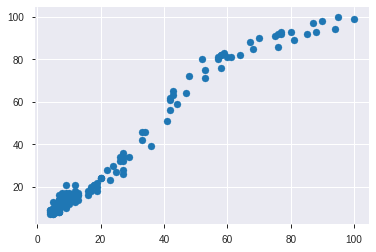

In [0]:
plt.scatter(df['data science'], df['machine learning'])

**Bar Chart**

<BarContainer object of 194 artists>

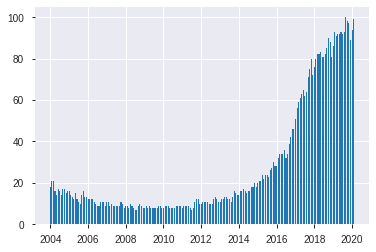

In [0]:
plt.bar(df['Mes'], df['machine learning'], width=20)

**Histogram**

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <a list of 15 Patch objects>)

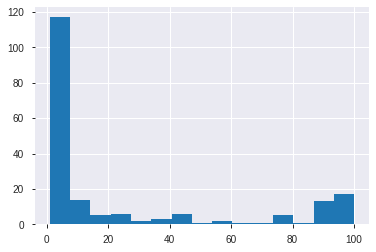

In [0]:
plt.hist(df['deep learning'], bins=15)

Adding marker and annotation : Have to find a work around

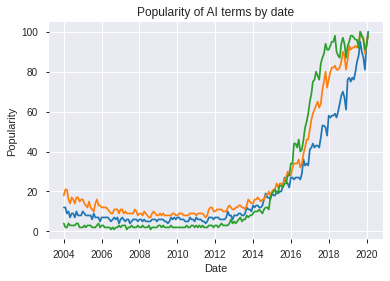

In [0]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
#plt.text(x='2010-01', y=80, s=r'$\lambda=1, r^2=0.8$') #Coordinates use the same units as the graph
#plt.annotate('Notice something?', xy=('2014-01-01', 30), xytext=('2006-01-01', 50), arrowprops={'facecolor':'red', 'shrink':0.05})


Link to all types of plots in matplotlib : **https://matplotlib.org/gallery/index.html**

### **SEABORN**
Seaborn is a library based on Matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


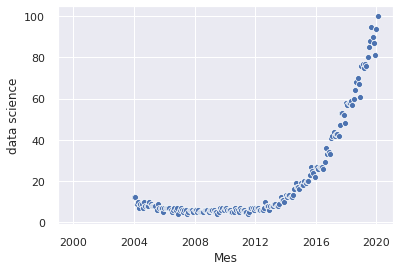

In [0]:
import seaborn as sns
sns.set()
sns.scatterplot(df['Mes'], df['data science'])

Graph bases on categorical data as column and color coding 

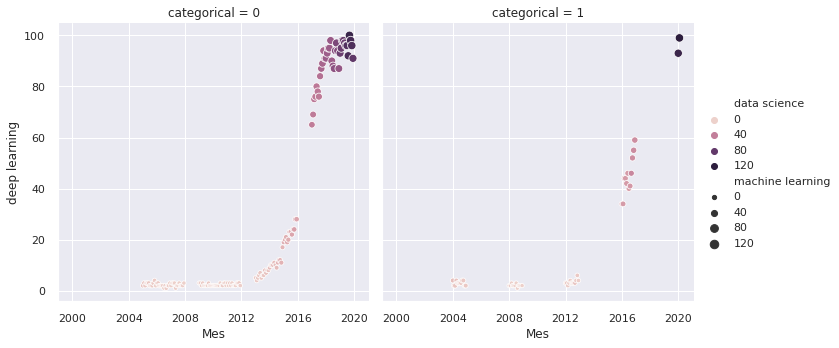

In [0]:
sns.relplot(x='Mes', y='deep learning', hue='data science', size='machine learning', col='categorical', data=df)

**Heatmap Graph**

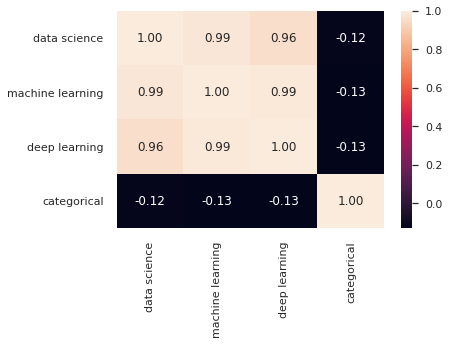

In [0]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Pairplot**

This will be really slow for large data set and hence use samples 

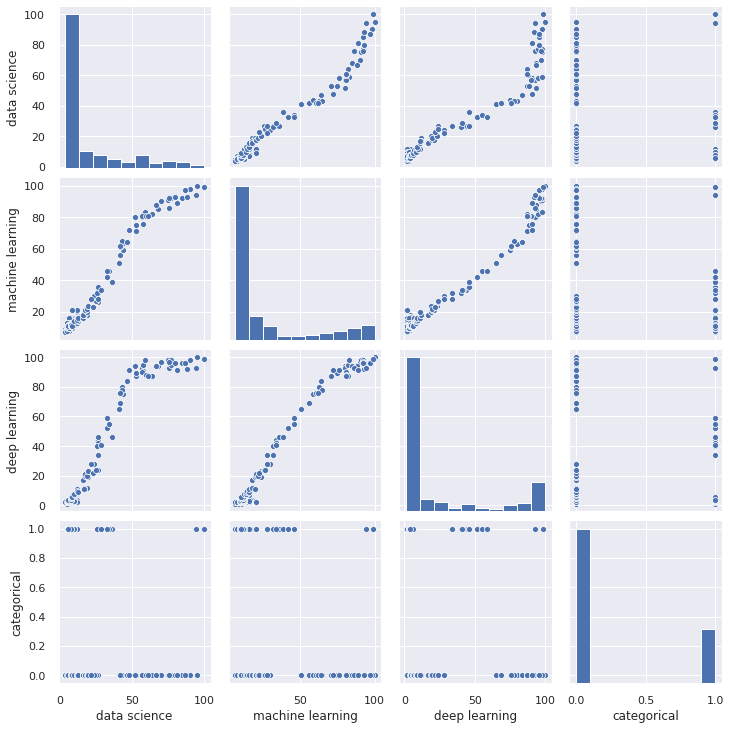

In [0]:
sns.pairplot(df)

 pairplot showing the charts segmented according to the values of the categorical variable

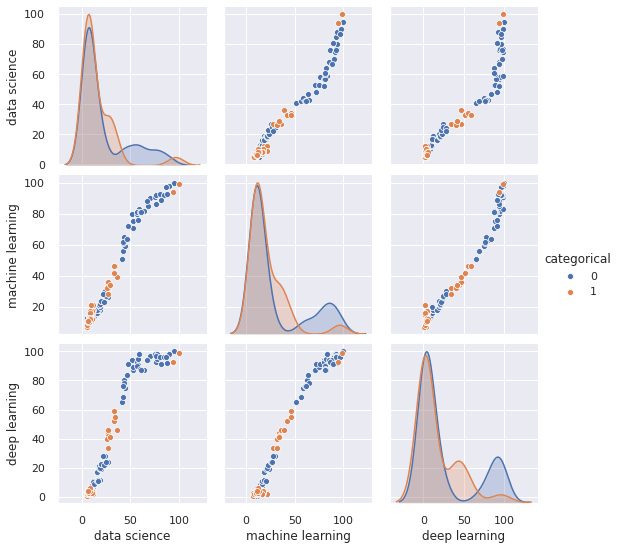

In [0]:
sns.pairplot(df, hue='categorical')

**Joint Plot - Scatter plot + Histogram together**

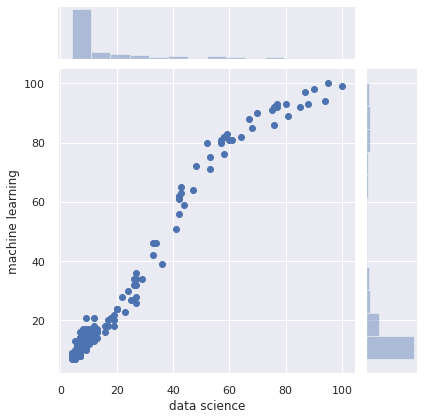

In [0]:
sns.jointplot(x='data science', y='machine learning', data=df)

**ViolinPlot**

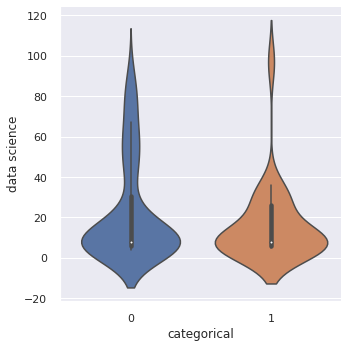

In [0]:
sns.catplot(x='categorical', y='data science', kind='violin', data=df)

Multiple subplots in same plot in Seaborn

Text(0.5, 1.0, 'Machine Learning')

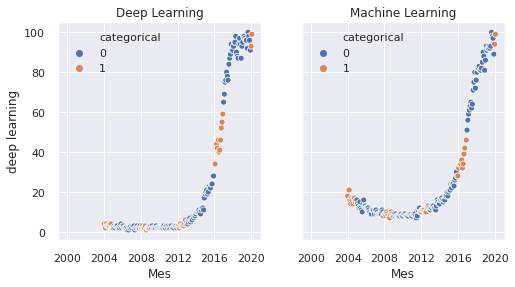

In [0]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning')

Seaborn Libraries : https://seaborn.pydata.org/examples/index.html

### **BOKEH**

`Bokeh is a library that allows you to generate interactive graphics. We can export them to an HTML document that we can share with anyone who has a web browser.`

In [0]:
from bokeh.plotting import figure, output_file, save
output_file('data_science_popularity.html')

In [0]:
p = figure(title='data science', x_axis_label='Mes', y_axis_label='data science')
p.line(df['Mes'], df['data science'], legend_label='popularity', line_width=2)
save(p)

'/content/multiple_graphs.html'

Bokeh gallery -- https://docs.bokeh.org/en/latest/docs/gallery.html

### **FOLIUM for mapping**

In [0]:
!pip install folium

In [0]:
import folium
m1 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=18)
m1.save('map1.html')

Add marker to file

In [0]:
m2 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=16)
folium.Marker([41.38, 2.176], popup='<i>You can use whatever HTML code you want</i>', tooltip='click here').add_to(m2)
folium.Marker([41.38, 2.174], popup='<b>You can use whatever HTML code you want</b>', tooltip='dont click here').add_to(m2)
#m2.save('map2.html')
m2


In [0]:
downloaded = drive.CreateFile({'id':"1BAgfLYJGTogPJWbYk26-F0_1-5xVbwKT"})  
downloaded.GetContentFile('mapa.csv')

In [0]:
!pip install geopandas

In [0]:
from geopandas.tools import geocode
df2 = pd.read_csv('mapa.csv')
df2.dropna(axis=0, inplace=True)
df2['geometry'] = geocode(df2['País'], provider='nominatim')['geometry'] #It may take a while because it downloads a lot of data.
df2['Latitude'] = df2['geometry'].apply(lambda l: l.y)
df2['Longitude'] = df2['geometry'].apply(lambda l: l.x)

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [0]:
m3 = folium.Map(location=[39.326234,-4.838065], tiles='openstreetmap', zoom_start=3)
def color_producer(val):
	if val <= 50:
		return 'red'
	else:
		return 'green'
for i in range(0,len(df2)):
	folium.Circle(location=[df2.iloc[i]['Latitude'], df2.iloc[i]['Longitude']], radius=5000*df2.iloc[i]['data science'], color=color_producer(df2.iloc[i]['data science'])).add_to(m3)
m3.save('map3.html')
m3